#Unzipping files

In [ ]:
import zipfile
import os
from tqdm import tqdm

datasetPath = "drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Dataset"
# Define the path of the uploaded zip file
zip_path = datasetPath + "/DATASET_CLASSIFICATORESMALL.zip"  # Change this to the actual file path

# Define the extraction directory (same as the zip file's location)
extract_dir = os.path.dirname(datasetPath+"/Imgs")

# Open the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()

    # Extract files with progress bar
    for file in tqdm(file_list, desc="Extracting", unit="file"):
        zip_ref.extract(file, extract_dir)

print(f"Extracted files are in: {extract_dir}")


FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Dataset/DATASET_CLASSIFICATORESMALL.zip'

# Initialization of the notebook with installation and import of correct versions of libraries.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Mar 13 17:57:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import numpy as np
import tensorflow as tf
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
tfk = tf.keras
tfkl = tfk.layers
import gc
import cv2
import keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from functools import partial
from itertools import product

In [ ]:
!unzip drive/MyDrive/TecnosensSondaOttica/DATASET_CLASSIFICATORESMALL.zip -d ./dataset

unzip:  cannot find or open drive/MyDrive/TecnosensSondaOttica/DATASET_CLASSIFICATORESMALL.zip, drive/MyDrive/TecnosensSondaOttica/DATASET_CLASSIFICATORESMALL.zip.zip or drive/MyDrive/TecnosensSondaOttica/DATASET_CLASSIFICATORESMALL.zip.ZIP.


In [ ]:
!unzip drive/MyDrive/TecnosensSondaOttica/strange_images.zip -d ./dataset_strange

unzip:  cannot find or open drive/MyDrive/TecnosensSondaOttica/strange_images.zip, drive/MyDrive/TecnosensSondaOttica/strange_images.zip.zip or drive/MyDrive/TecnosensSondaOttica/strange_images.zip.ZIP.


In [ ]:
%ls

drive/  sample_data/


# Setting a seed on all frameworks for reproducibility

In [ ]:
# Random seed for reproducibility
seed = 1234

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Load data and preprocessing

##Create Dataset

###Load data

In [ ]:
datasetPath = "drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Dataset"

In [ ]:
%cd drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Dataset

/content/drive/.shortcut-targets-by-id/1_uEu56UfwrBHAm5_JXL_gNVyl5kFHtG5/HPPS/Project/ModelClassification/Dataset


In [ ]:
errors = pd.read_csv("errors.csv")

In [ ]:
%ls

DATASET_CLASSIFICATORESMALL/     errors.csv  strange_images/
DATASET_CLASSIFICATORESMALL.zip  __MACOSX/   strange_images_classes.csv


In [ ]:
X_train = []
Y_train = []
X_val = []
Y_val = []
X_test = []
Y_test = []

dir = "DATASET_CLASSIFICATORESMALL"
images = os.listdir(dir)
images.sort()
if ".DS_Store" in images:
    print("Rimosso .DS_Store")
    images.remove(".DS_Store")

In [ ]:
len(images)

8814

In [ ]:
len(errors)

16665

In [ ]:
np.random.seed(42)
print(gc.collect())

angle = -8
step = 0.1
old_distance = np.inf

i = -1
for image in tqdm(images):
  i += 1

  for j,elem in enumerate(image):
      if elem == '_':
          start = j

  distance = int(image[start+1:-4])
  if distance > old_distance:
     angle += step

  old_distance = distance

  train_val_test = np.random.randint(0,20) #random value to decide if set of images will be assigned to training, validation or test set (70%,10%,20%)

  if train_val_test < 7:
    image = cv2.imread("DATASET_CLASSIFICATORESMALL/" + image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #image = cv2.resize(image, (446,446))
    #image = cv2.GaussianBlur(image, (7,7), 0)
    #image[image>81] = 255
    #image[(image<=81) & (image > 61)] = 175
    #image[(image<=61) & (image > 41)] = 105
    #image[(image<=41) & (image > 21)] = 55
    #image[image<21] = 0
    #image = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
    X_train.append(image.astype('float16')/255)
    Y_train.append([errors[i:i+1]['STD'][i],distance, angle])
  elif train_val_test < 8:
    image = cv2.imread("DATASET_CLASSIFICATORESMALL/" + image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #image = cv2.resize(image, (446,446))
    #image = cv2.GaussianBlur(image, (7,7), 0)
    #image[image>81] = 255
    #image[(image<=81) & (image > 61)] = 175
    #image[(image<=61) & (image > 41)] = 105
    #image[(image<=41) & (image > 21)] = 55
    #image[image<21] = 0
    #image = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
    X_val.append(image.astype('float16')/255)
    Y_val.append([errors[i:i+1]['STD'][i],distance, angle])
  elif train_val_test < 10:
    image = cv2.imread("DATASET_CLASSIFICATORESMALL/" + image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #image = cv2.resize(image, (446,446))
    #image = cv2.GaussianBlur(image, (7,7), 0)
    #image[image>81] = 255
    #image[(image<=81) & (image > 61)] = 175
    #image[(image<=61) & (image > 41)] = 105
    #image[(image<=41) & (image > 21)] = 55
    #image[image<21] = 0
    #image = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
    X_test.append(image.astype('float16')/255)
    Y_test.append([errors[i:i+1]['STD'][i],distance, angle])

0


  0%|          | 0/8814 [00:00<?, ?it/s]

### Augmentation for corner cases

In [ ]:
%ls

DATASET_CLASSIFICATORESMALL/     errors.csv  strange_images/
DATASET_CLASSIFICATORESMALL.zip  __MACOSX/   strange_images_classes.csv


In [ ]:
%cd strange_images

/content/drive/.shortcut-targets-by-id/1_uEu56UfwrBHAm5_JXL_gNVyl5kFHtG5/HPPS/Project/ModelClassification/Dataset/strange_images


In [ ]:
X_strange = []

dir = "Immagini/"
images = os.listdir(dir)
images.sort()
if ".DS_Store" in images:
    images.remove(".DS_Store")
np.random.seed(42)
print(gc.collect())

for image in tqdm(images):
    image = cv2.imread(dir + image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (560,560))
    X_strange.append(image)#.astype('float16')/255)

X_strange = np.array(X_strange)
X_strange = np.expand_dims(X_strange,axis=-1)
X_strange.shape

0


  0%|          | 0/41 [00:00<?, ?it/s]

(41, 560, 560, 1)

In [ ]:
%cd ..

/content/drive/.shortcut-targets-by-id/1_uEu56UfwrBHAm5_JXL_gNVyl5kFHtG5/HPPS/Project/ModelClassification/Dataset


In [ ]:
classes = pd.read_csv("strange_images_classes.csv")

In [ ]:
gen = ImageDataGenerator(rotation_range=60,
                         height_shift_range=25,
                         width_shift_range=25,
                         zoom_range=[1,1.5],
                         #brightness_range = [0.9,1.0],
                         horizontal_flip=False,
                         vertical_flip=False,
                         fill_mode='nearest')

In [ ]:
for j in tqdm(range(70)):
  for i in range(X_strange.shape[0]):

    train_val_test = np.random.randint(0,10) #random value to decide if set of images will be assigned to training, validation or test set (70%,10%,20%)
    if train_val_test < 7:
      t1 = gen.get_random_transform(img_shape=(560, 560), seed=seed+i+8*j)
      augmented1 = gen.apply_transform(X_strange[i], t1)
      augmented1 = augmented1.astype('float16')/255
      X_train.append(augmented1[:,:,0])
      Y_train.append((classes['Classe'][i],0,0))

    else:
      t1 = gen.get_random_transform(img_shape=(560, 560), seed=seed+i+123+67*j)
      augmented1 = gen.apply_transform(X_strange[i], t1)
      augmented1 = augmented1.astype('float16')/255
      X_val.append(augmented1[:,:,0])
      Y_val.append((classes['Classe'][i],0,0))

  0%|          | 0/70 [00:00<?, ?it/s]

### Visualization for blur

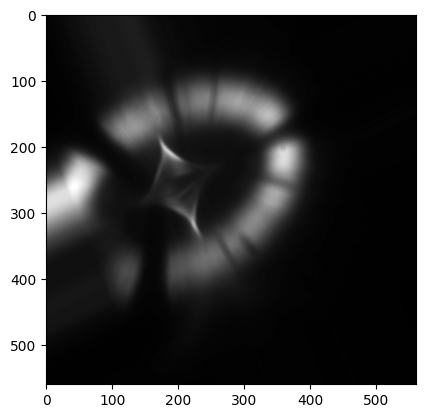

In [ ]:
plt.imshow(X_train[-1],cmap='gray')

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/median_blur.simd.hpp:880: error: (-215:Assertion failed) src.depth() == CV_8U && (cn == 1 || cn == 3 || cn == 4) in function 'medianBlur'


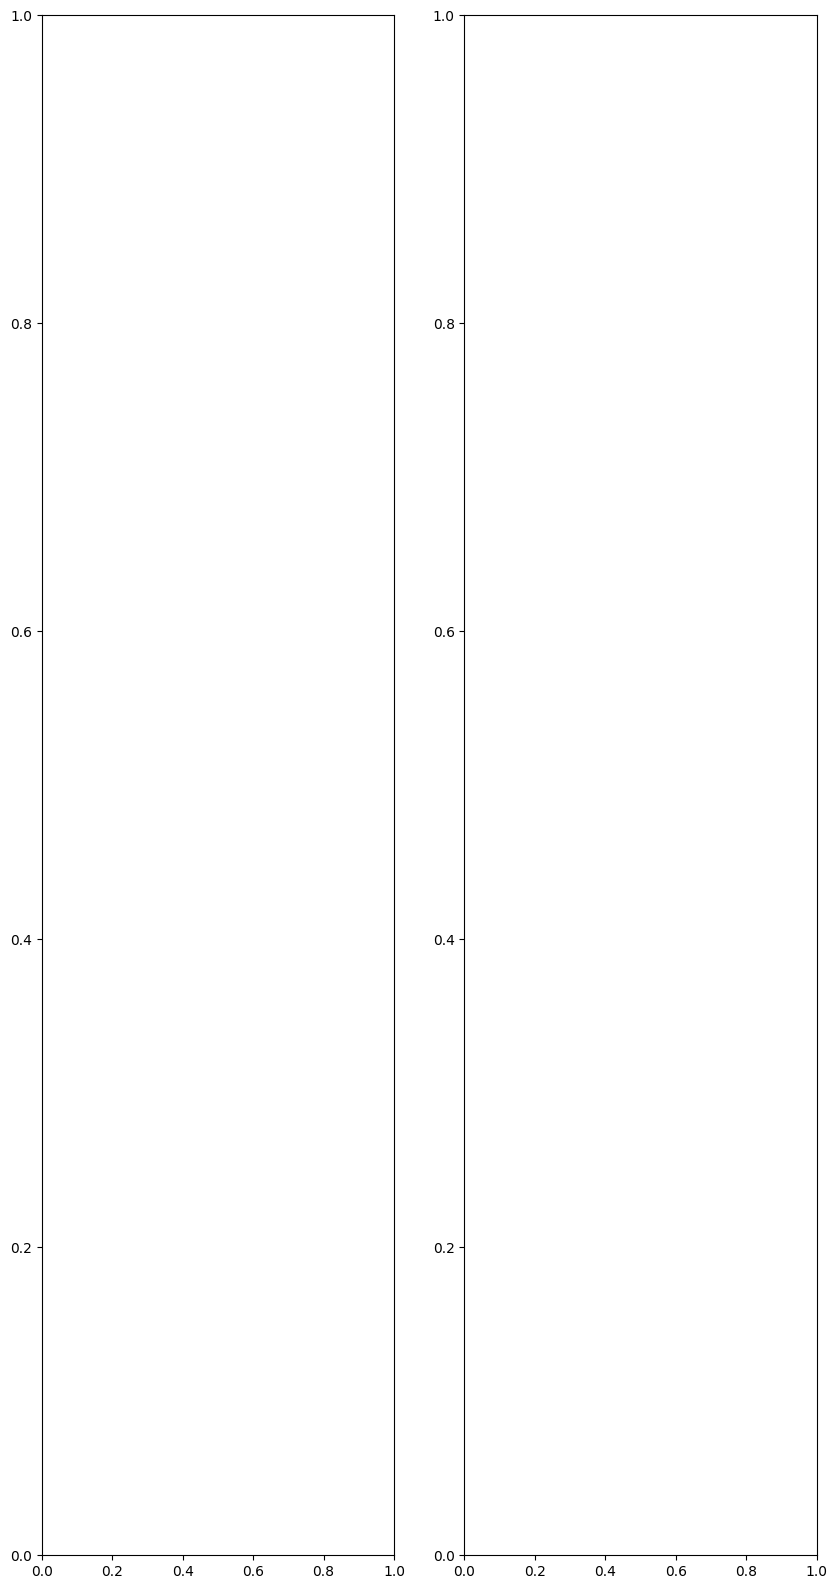

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(10,20))
sample = X_train[-72].copy()
#sample = sample*(0.20)
#sample[sample<0.04] = 0.04
#minimum = np.min(sample)
#sample[sample<(minimum+5)] = (sample[sample<(minimum+5)] - minimum)*3 + minimum
for i in range(1):
  sample = cv2.medianBlur(sample, 51)
#sample[sample>0.2] = 0.2
#minimum = np.min(sample)
#sample = (sample-minimum)*10 + minimum
#sample[sample>0.2] = 0.2
axs[0].imshow(sample,cmap='gray')
axs[1].imshow(X_test_strange[0],cmap='gray')

In [ ]:
np.max(X_test_strange[0]), np.min(X_test_strange[0]), np.max(sample), np.min(sample)

In [ ]:
sns.distplot(X_test_strange[0])

In [ ]:
sns.distplot(sample)

In [ ]:
sample = X_train[-1] + 0.6
sample[sample>1] = 1
plt.imshow(sample,cmap='gray')

### Category creation

In [ ]:
#gc.collect()

X_train = np.array(X_train)
Y_train = np.array(Y_train, dtype="float32")
print("Shape of Train set's images: " + str(X_train.shape))
print("Shape of Train set's labels: " + str(Y_train.shape))

X_val = np.array(X_val)
Y_val = np.array(Y_val, dtype="float32")
print("Shape of Val set's images: " + str(X_val.shape))
print("Shape of Val set's labels: " + str(Y_val.shape))

X_test = np.array(X_test)
Y_test = np.array(Y_test, dtype="float32")
print("Shape of Test set's images: " + str(X_test.shape))
print("Shape of Test set's labels: " + str(Y_test.shape))

Shape of Train set's images: (5029, 560, 560)
Shape of Train set's labels: (5029, 3)
Shape of Val set's images: (1341, 560, 560)
Shape of Val set's labels: (1341, 3)
Shape of Test set's images: (862, 560, 560)
Shape of Test set's labels: (862, 3)


In [ ]:
#Y_train = Y_train[:,:3]
#Y_val = Y_val[:,:3]
#Y_test = Y_test[:,:3]

In [ ]:
binary = False
threshold1 = 10
threshold2 = 40
train_categories = []
val_categories = []
test_categories = []

if not binary:
  #1 in position 0 means good prediction, 1 in position 1 means bad prediction, 1 in position 2 means unavailable prediction
  for row in Y_train:
      if row[0] > threshold2:
          train_categories.append([0,0,1])
      elif row[0] > threshold1:
          train_categories.append([0,1,0])
      else:
          train_categories.append([1,0,0])

  train_categories = np.array(train_categories)

  for row in Y_val:
      if row[0] > threshold2:
          val_categories.append([0,0,1])
      elif row[0] > threshold1:
          val_categories.append([0,1,0])
      else:
          val_categories.append([1,0,0])

  val_categories = np.array(val_categories)

  for row in Y_test:
      if row[0] > threshold2:
          test_categories.append([0,0,1])
      elif row[0] > threshold1:
          test_categories.append([0,1,0])
      else:
          test_categories.append([1,0,0])

  test_categories = np.array(test_categories)
else:
  #0 means good prediction, 1 means unavailable prediction
  for row in Y_train:
      if row[0] > threshold1:
          train_categories.append([1])
      else:
          train_categories.append([0])

  train_categories = np.array(train_categories)

  for row in Y_val:
      if row[0] > threshold1:
          val_categories.append([1])
      else:
          val_categories.append([0])

  val_categories = np.array(val_categories)

  for row in Y_test:
      if row[0] > threshold1:
          test_categories.append([1])
      else:
          test_categories.append([0])

  test_categories = np.array(test_categories)

Y_train = np.hstack([Y_train, train_categories])
Y_val = np.hstack([Y_val, val_categories])
Y_test = np.hstack([Y_test, test_categories])


In [ ]:
Y_train.shape, Y_val.shape, Y_test.shape

((5029, 6), (1341, 6), (862, 6))

In [ ]:
np.mean(Y_train[:,3]), np.mean(Y_train[:,4]), np.mean(Y_train[:,5]) #labels distribution

(0.7251938755219726, 0.12427918075164049, 0.15052694372638695)

In [ ]:
X_train = np.expand_dims(X_train,3)
X_val = np.expand_dims(X_val,3)
X_test = np.expand_dims(X_test,3)

**Save dataset**

In [ ]:
import numpy as np

# Define the path to save the data
file_path = "preprocessed_dataset.npz"

# Save all datasets
np.savez_compressed(file_path,
                    X_train=X_train, Y_train=Y_train,
                    X_val=X_val, Y_val=Y_val,
                    X_test=X_test, Y_test=Y_test)

print(f"Dataset saved to {file_path}")


Dataset saved to preprocessed_dataset.npz


## Definition of the models

###standard

In [ ]:
import torch
import torch.nn.functional as F
from functools import partial
from itertools import product

def w_categorical_crossentropy(y_true, y_pred, weights):
    nb_cl = len(weights)

    # Create mask
    final_mask = torch.zeros_like(y_pred[:, 0])
    final_mask = final_mask.float()

    # Get max prediction per sample
    y_pred_max, _ = torch.max(y_pred, dim=1, keepdim=True)
    y_pred_max_mat = (y_pred == y_pred_max).float()  # Element-wise comparison

    y_true = y_true.float()

    # Apply weighted mask
    for c_p, c_t in product(range(nb_cl), range(nb_cl)):
        final_mask += (weights[c_t, c_p] * y_pred_max_mat[:, c_p] * y_true[:, c_t])

    # Compute categorical cross-entropy with weights
    loss = F.cross_entropy(y_pred, y_true, reduction='none') * final_mask
    return loss.mean()

# Convert weight array to PyTorch tensor
w_array = torch.tensor([
    [0.0, 0.4, 0.5],
    [0.5, 0.0, 0.3],
    [0.3, 0.3, 0.0]
], dtype=torch.float32)

# Use functools.partial to fix weights
ncce = partial(w_categorical_crossentropy, weights=w_array)


**eval_w_categorical_crossentropy FIXED**

In [ ]:
import torch
import torch.nn.functional as F
from itertools import product

def eval_w_categorical_crossentropy(y_true, y_pred):
    # Define weight matrix
    weights = torch.tensor([
        [0.0, 0.4, 0.5],
        [0.5, 0.0, 0.3],
        [0.3, 0.3, 0.0]
    ], dtype=torch.float32, device=y_pred.device)

    nb_cl = len(weights)

    # Initialize final_mask correctly
    final_mask = torch.zeros_like(y_pred[:, 0])

    # Convert to float for compatibility
    y_pred_max, _ = torch.max(y_pred, dim=1, keepdim=True)  # Find max prediction per row
    y_pred_max_mat = torch.eq(y_pred, y_pred_max).float()  # Compare and cast to float
    y_true = y_true.float()

    # Accumulate weight values
    for c_p, c_t in product(range(nb_cl), range(nb_cl)):
        final_mask = final_mask + (weights[c_t, c_p] * y_pred_max_mat[:, c_p] * y_true[:, c_t])

    # Compute categorical cross-entropy loss with element-wise weighting
    loss = F.cross_entropy(y_pred, y_true, reduction='none') * final_mask
    return loss.mean()  # Return mean loss


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class StandardModel(nn.Module):
    def __init__(self, input_shape, elastic_lambda):
        super(StandardModel, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=input_shape[0], out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 48, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(48, 64, kernel_size=3, stride=1, padding=0)
        self.conv5 = nn.Conv2d(64, 96, kernel_size=3, stride=1, padding=0)
        self.conv6 = nn.Conv2d(96, 128, kernel_size=3, stride=1, padding=0)

        # Pooling layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.global_pool = nn.AdaptiveAvgPool2d(1)  # Equivalent to GlobalAveragePooling2D

        # Fully connected layers
        self.fc1 = nn.Linear(128, 128)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 3)  # 3 output classes

        # Elastic regularization (L1 + L2)
        self.l1_lambda = elastic_lambda
        self.l2_lambda = elastic_lambda

    def forward(self, x):
        # Convolutional layers with activation and pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = self.global_pool(F.relu(self.conv6(x)))  # Swish activation

        # Flatten tensor
        x = torch.flatten(x, 1)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return F.log_softmax(x, dim=1)  # Softmax with log-probabilities

# Instantiate model
input_shape = (1, 300, 300)  # Example: 1 channel (grayscale) image
elastic_lambda = 0.0001
model = StandardModel(input_shape, elastic_lambda)

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


###binary

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class BinaryModel(nn.Module):
    def __init__(self, input_shape, elastic_lambda):
        super(BinaryModel, self).__init__()

        # Convolutional block
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4 = nn.Conv2d(64, 96, kernel_size=3, stride=1, padding=0)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv5 = nn.Conv2d(96, 128, kernel_size=3, stride=1, padding=1)  # 'same' padding equivalent

        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)  # Global Average Pooling

        # Fully connected layers
        self.fc1 = nn.Linear(128, 128)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 1)

        # L1 & L2 regularization
        self.elastic_lambda = elastic_lambda

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.pool2(x)

        x = F.relu(self.conv3(x))
        x = self.pool3(x)

        x = F.relu(self.conv4(x))
        x = self.pool4(x)

        x = F.relu(self.conv5(x))
        x = self.global_avg_pool(x)  # (batch, 128, 1, 1)

        x = torch.flatten(x, start_dim=1)  # Flatten (batch, 128)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))  # Binary output

        return x


###no_ohe

**no_ohe_accuracy FIXED**

In [ ]:
#------------------------------------------------------------------------------------------
# Fixed indexing issue: ensured y_true is always 1D using .flatten()
# Converted y_pred to NumPy before indexing to prevent TensorFlow tensor errors
# Ensured pred and y_true have the same length to avoid out-of-range indexing
#------------------------------------------------------------------------------------------

def no_ohe_accuracy(y_true, y_pred):
    pred = np.zeros_like(y_pred)  # Match pred shape to y_pred
    pred[y_pred < 0.6] = 0
    pred[(y_pred >= 0.6) & (y_pred <= 1.4)] = 1
    pred[y_pred > 1.4] = 2

    # Ensure `y_true` is always 1D
    y_true = y_true.flatten()

    # Ensure `pred` matches `y_true` length
    pred = pred[:len(y_true)]

    return np.mean(pred == y_true)


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

#------------------------------------------------------------------------------------------
# Fixed shape matching: ensured `pred` and `y_pred` have the same shape
# Removed TensorFlow dependencies, now fully NumPy-based
# Ensured pred has the same length as y_true (fix for last batch issue)
#------------------------------------------------------------------------------------------

def no_ohe_f1(y_true, y_pred):
    pred = np.zeros_like(y_pred)  # Match shape with y_pred
    pred[y_pred < 0.6] = 0
    pred[(y_pred >= 0.6) & (y_pred <= 1.4)] = 1
    pred[y_pred > 1.4] = 2

    # Ensure pred has the same length as y_true (fix for last batch issue)
    pred = pred[:len(y_true)]

    return f1_score(y_true, pred, average='macro')


**ORIGINAL CODE no_ohe_f1**
```
from sklearn.metrics import f1_score

#PROBLEM: this forces batch size = 28
def no_ohe_f1(y_true, y_pred):
  pred = np.zeros(128)
  pred[tf.where(y_pred<0.6).numpy()] = 0
  pred[tf.where((y_pred>=0.6) & (y_pred<=1.4)).numpy()] = 1
  pred[tf.where(y_pred>1.4).numpy()] = 2

  if len(pred)!=len(y_true):
    pred = pred[:109]
  if len(pred)!=len(y_true):
    pred = pred[:28]

  return f1_score(y_true, pred, average='macro')```



In [ ]:
#------------------------------------------------------------------------------------------
# IMPORT LIBRARIES
#------------------------------------------------------------------------------------------

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

#------------------------------------------------------------------------------------------
# DEFINE THE MODEL
#------------------------------------------------------------------------------------------

class NoOHEModel(nn.Module):
    def __init__(self, input_shape, elastic_lambda):
        super(NoOHEModel, self).__init__()

        # Extract number of input channels from shape
        in_channels = input_shape[0]

        # Convolutional block
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=3, stride=1, padding=0)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4 = nn.Conv2d(64, 96, kernel_size=3, stride=1, padding=0)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv5 = nn.Conv2d(96, 128, kernel_size=3, stride=1, padding=0)
        self.pool5 = nn.AdaptiveAvgPool2d(1)  # Global Average Pooling

        # Fully connected layer
        self.fc1 = nn.Linear(128, 128)
        self.dropout = nn.Dropout(0.3)

        # Output layer
        self.out = nn.Linear(128, 1)  # Linear activation for regression

        # Regularization parameter
        self.elastic_lambda = elastic_lambda

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.pool2(x)

        x = F.relu(self.conv3(x))
        x = self.pool3(x)

        x = F.relu(self.conv4(x))
        x = self.pool4(x)

        x = F.relu(self.conv5(x))
        x = self.pool5(x)

        x = torch.flatten(x, 1)  # Flatten for fully connected layers

        x = F.relu(self.fc1(x))
        x = self.dropout(x)

        x = self.out(x)  # Linear output

        return x

#------------------------------------------------------------------------------------------
# INITIALIZE MODEL, LOSS FUNCTION, AND OPTIMIZER
#------------------------------------------------------------------------------------------

def get_no_ohe_model(input_shape, elastic_lambda, learning_rate=0.001):
    model = NoOHEModel(input_shape, elastic_lambda)
    criterion = nn.L1Loss()  # Mean Absolute Error (MAE)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    return model, criterion, optimizer


##Open Dataset

In [ ]:
%ls

drive/  sample_data/


In [ ]:
import numpy as np

# Define the path where the dataset is saved
file_path = "drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Dataset/preprocessed_dataset.npz"

# Load the dataset
data = np.load(file_path)

# Extract variables
X_train, Y_train = data["X_train"], data["Y_train"]
X_val, Y_val = data["X_val"], data["Y_val"]
X_test, Y_test = data["X_test"], data["Y_test"]

print("Dataset successfully loaded!")

Dataset successfully loaded!


In [ ]:
print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")
print(f"X_val shape: {X_val.shape}, Y_val shape: {Y_val.shape}")
print(f"X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}")


X_train shape: (5029, 560, 560, 1), Y_train shape: (5029, 6)
X_val shape: (1341, 560, 560, 1), Y_val shape: (1341, 6)
X_test shape: (862, 560, 560, 1), Y_test shape: (862, 6)


**Reshape for more efficient training**

In [ ]:
import numpy as np
import cv2

# Reshape function
def resize_images(images, target_size=(300, 300)):
    resized_images = []
    for img in images:
        img = img.squeeze()  # Convert (560, 560, 1) → (560, 560) safely
        img = cv2.resize(img.astype(np.float32), target_size, interpolation=cv2.INTER_AREA)  # Resize
        img = np.expand_dims(img, axis=-1)  # Restore channel: (300, 300, 1)
        resized_images.append(img)
    return np.array(resized_images, dtype=np.float32)  # Ensure correct dtype

# Apply resizing
X_train = resize_images(X_train)
X_val = resize_images(X_val)
X_test = resize_images(X_test)

# Check new shapes
print(f"X_train shape: {X_train.shape}")  # Expected: (5029, 300, 300, 1)
print(f"X_val shape: {X_val.shape}")      # Expected: (1341, 300, 300, 1)
print(f"X_test shape: {X_test.shape}")    # Expected: (862, 300, 300, 1)


X_train shape: (5029, 300, 300, 1)
X_val shape: (1341, 300, 300, 1)
X_test shape: (862, 300, 300, 1)


# Training

##Standard model

**Basic Working Impl**

```
# Convert Data to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2)  # Fix shape
Y_train_tensor = torch.tensor(np.argmax(Y_train[:, 3:], axis=-1), dtype=torch.long)  # Convert to class indices

X_val_tensor = torch.tensor(X_val, dtype=torch.float32).permute(0, 3, 1, 2)  # Fix shape
Y_val_tensor = torch.tensor(np.argmax(Y_val[:, 3:], axis=-1), dtype=torch.long)  # Convert to class indices

# Create Dataset & DataLoader
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Inside Training Loop
for X_batch, Y_batch in train_loader:
    X_batch, Y_batch = X_batch.to("cuda"), Y_batch.to("cuda")

    optimizer.zero_grad()
    outputs = model(X_batch)  # Shape (batch_size, num_classes)
    loss = criterion(outputs, Y_batch)  # Y_batch should be (batch_size,)

    loss.backward()
    optimizer.step()

    running_loss += loss.item() * X_batch.size(0)
    _, predicted = outputs.max(1)  # Get class index (batch_size,)
    
    correct += predicted.eq(Y_batch).sum().item()  # No need to squeeze!
    total += Y_batch.size(0)
```



Epoch 1/300 - Train Loss: 0.6667, Train Acc: 0.7556, Train F1: 0.4235 - Val Loss: 0.5554, Val Acc: 0.7860, Val F1: 0.6669
Epoch 2/300 - Train Loss: 0.4093, Train Acc: 0.8445, Train F1: 0.7035 - Val Loss: 0.3531, Val Acc: 0.8881, Val F1: 0.8431
Epoch 3/300 - Train Loss: 0.3084, Train Acc: 0.8865, Train F1: 0.7853 - Val Loss: 0.2024, Val Acc: 0.9269, Val F1: 0.8903
Epoch 4/300 - Train Loss: 0.2421, Train Acc: 0.9079, Train F1: 0.8236 - Val Loss: 0.1475, Val Acc: 0.9336, Val F1: 0.8921
Epoch 5/300 - Train Loss: 0.2243, Train Acc: 0.9151, Train F1: 0.8405 - Val Loss: 0.1315, Val Acc: 0.9590, Val F1: 0.9412
Epoch 6/300 - Train Loss: 0.2004, Train Acc: 0.9207, Train F1: 0.8500 - Val Loss: 0.1400, Val Acc: 0.9515, Val F1: 0.9307
Epoch 7/300 - Train Loss: 0.1916, Train Acc: 0.9236, Train F1: 0.8581 - Val Loss: 0.1041, Val Acc: 0.9538, Val F1: 0.9285
Epoch 8/300 - Train Loss: 0.1881, Train Acc: 0.9248, Train F1: 0.8558 - Val Loss: 0.0925, Val Acc: 0.9635, Val F1: 0.9461
Epoch 9/300 - Train Loss

<ipython-input-19-c7c2664d6e95>:144: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


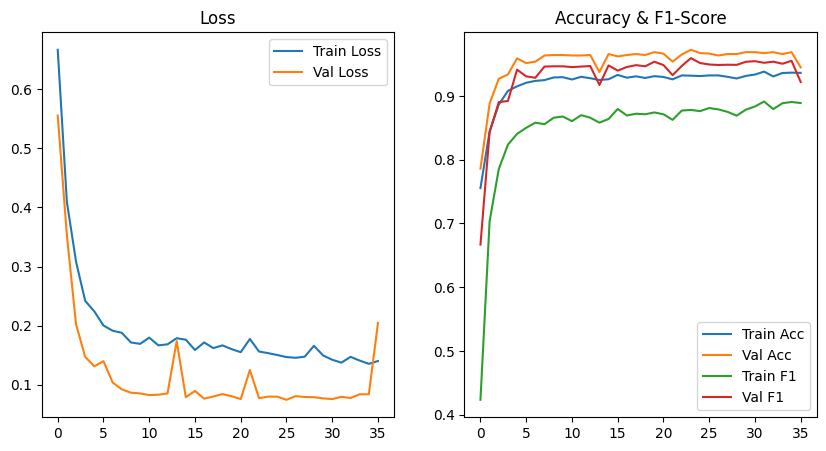

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

#------------------------------------------------------------------------------------------
# DEFINE HYPERPARAMS TUNING
#------------------------------------------------------------------------------------------

lam = 1e-4
input_shape = (1, 300, 300)  # Adjust based on X_train
num_epochs = 300
batch_size = 16
learning_rate = 0.001

#------------------------------------------------------------------------------------------

# Convert Data to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2)  # Fix shape
Y_train_tensor = torch.tensor(Y_train[:, 3:], dtype=torch.long)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32).permute(0, 3, 1, 2)  # Fix shape
Y_val_tensor = torch.tensor(Y_val[:, 3:], dtype=torch.long)

# Convert labels to class indices (if they are one-hot)
Y_train_tensor = torch.tensor(np.argmax(Y_train[:, 3:], axis=-1), dtype=torch.long)
Y_val_tensor = torch.tensor(np.argmax(Y_val[:, 3:], axis=-1), dtype=torch.long)

# DataLoader
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


# Initialize Model
model = StandardModel(input_shape, lam)
model.to("cuda" if torch.cuda.is_available() else "cpu")  # Move model to GPU if available

# Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Early stopping settings
early_stopping_patience = 10
best_val_loss = float('inf')
patience_counter = 0

import matplotlib.pyplot as plt

# Track history manually
history = {
    'loss': [],
    'val_loss': [],
    'accuracy': [],
    'val_accuracy': [],
    'f1_score': [],
    'val_f1_score': []
}

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    for X_batch, Y_batch in train_loader:
        X_batch, Y_batch = X_batch.to("cuda"), Y_batch.to("cuda")

        optimizer.zero_grad()
        outputs = model(X_batch)  # Shape (batch_size, num_classes)
        loss = criterion(outputs, Y_batch)  # Y_batch should be (batch_size,)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * X_batch.size(0)
        _, predicted = outputs.max(1)  # Get class index
        correct += predicted.eq(Y_batch).sum().item()
        total += Y_batch.size(0)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(Y_batch.cpu().numpy())

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = correct / total
    train_f1 = f1_score(all_labels, all_preds, average='macro')  # Compute F1-score

    # Validation Step
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, Y_batch in val_loader:
            X_batch, Y_batch = X_batch.to("cuda"), Y_batch.to("cuda")

            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)

            val_loss += loss.item() * X_batch.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(Y_batch).sum().item()
            total += Y_batch.size(0)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(Y_batch.cpu().numpy())

    val_loss /= len(val_loader.dataset)
    val_acc = correct / total
    val_f1 = f1_score(all_labels, all_preds, average='macro')

    # Store metrics
    history['loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['accuracy'].append(train_acc)
    history['val_accuracy'].append(val_acc)
    history['f1_score'].append(train_f1)
    history['val_f1_score'].append(val_f1)

    print(f"Epoch {epoch+1}/{num_epochs} - "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Train F1: {train_f1:.4f} - "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val F1: {val_f1:.4f}")

    # Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_model.pth")  # Save best model
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered!")
            break

# Load best model
model.load_state_dict(torch.load("best_model.pth"))

# Plot Metrics
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history['accuracy'], label='Train Acc')
plt.plot(history['val_accuracy'], label='Val Acc')
plt.plot(history['f1_score'], label='Train F1')
plt.plot(history['val_f1_score'], label='Val F1')
plt.legend()
plt.title('Accuracy & F1-Score')

plt.show()



In [ ]:
%cd drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Weights

/content/drive/.shortcut-targets-by-id/1_uEu56UfwrBHAm5_JXL_gNVyl5kFHtG5/HPPS/Project/ModelClassification/Weights


In [ ]:
%ls

brevitas_fullstandardmodel.pth  brevitas_standardmodel_weights.pth


In [ ]:
torch.save(model.state_dict(), "pytorch_model_weights.pth")


In [ ]:
torch.save(model, "pytorch_fullmodel.pth")


##Binary model

In [ ]:
#------------------------------------------------------------------------------------------
# IMPORT LIBRARIES
#------------------------------------------------------------------------------------------

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score

#------------------------------------------------------------------------------------------
# DEFINE HYPERPARAMETERS
#------------------------------------------------------------------------------------------

lam = 1e-4
input_shape = (1, 300, 300)  # PyTorch format (C, H, W)
num_epochs = 300
batch_size = 8
learning_rate = 0.001
early_stopping_patience = 40

#------------------------------------------------------------------------------------------
# PREPARE DATA FOR PYTORCH
#------------------------------------------------------------------------------------------

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2)  # Convert to (batch, C, H, W)
Y_train_binary = torch.tensor((Y_train[:, 3] > 0.5).astype(np.float32), dtype=torch.float32).unsqueeze(1)  # Shape: (5029, 1)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32).permute(0, 3, 1, 2)  # Convert to (batch, C, H, W)
Y_val_binary = torch.tensor((Y_val[:, 3] > 0.5).astype(np.float32), dtype=torch.float32).unsqueeze(1)  # Shape: (1341, 1)

# Create PyTorch Datasets and DataLoaders
train_dataset = TensorDataset(X_train_tensor, Y_train_binary)
val_dataset = TensorDataset(X_val_tensor, Y_val_binary)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

#------------------------------------------------------------------------------------------
# INITIALIZE MODEL, LOSS, AND OPTIMIZER
#------------------------------------------------------------------------------------------

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BinaryModel(input_shape, lam).to(device)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#------------------------------------------------------------------------------------------
# TRAINING LOOP
#------------------------------------------------------------------------------------------

best_val_f1 = 0
patience_counter = 0

history = {
    'loss': [],
    'val_loss': [],
    'accuracy': [],
    'val_accuracy': [],
    'f1_score': [],
    'val_f1_score': []
}

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    for X_batch, Y_batch in train_loader:
        X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)  # Forward pass
        loss = criterion(outputs, Y_batch)  # Compute loss

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * X_batch.size(0)
        preds = (outputs > 0.5).float()  # Convert logits to binary (0 or 1)
        correct += (preds == Y_batch).sum().item()
        total += Y_batch.size(0)

        all_preds.extend(preds.cpu().numpy().flatten())
        all_labels.extend(Y_batch.cpu().numpy().flatten())

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = correct / total
    train_f1 = f1_score(all_labels, all_preds)

    #------------------------------------------------------------------------------------------
    # VALIDATION STEP
    #------------------------------------------------------------------------------------------

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, Y_batch in val_loader:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)

            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)

            val_loss += loss.item() * X_batch.size(0)
            preds = (outputs > 0.5).float()
            correct += (preds == Y_batch).sum().item()
            total += Y_batch.size(0)

            all_preds.extend(preds.cpu().numpy().flatten())
            all_labels.extend(Y_batch.cpu().numpy().flatten())

    val_loss /= len(val_loader.dataset)
    val_acc = correct / total
    val_f1 = f1_score(all_labels, all_preds)

    # Store metrics
    history['loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['accuracy'].append(train_acc)
    history['val_accuracy'].append(val_acc)
    history['f1_score'].append(train_f1)
    history['val_f1_score'].append(val_f1)

    print(f"Epoch {epoch+1}/{num_epochs} - "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Train F1: {train_f1:.4f} - "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val F1: {val_f1:.4f}")

    #------------------------------------------------------------------------------------------
    # EARLY STOPPING
    #------------------------------------------------------------------------------------------

    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        patience_counter = 0
        torch.save(model.state_dict(), "best_binary_model.pth")  # Save best model
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered!")
            break

# Load the best model
model.load_state_dict(torch.load("best_binary_model.pth"))


Epoch 1/300 - Train Loss: 0.5501, Train Acc: 0.7660, Train F1: 0.8595 - Val Loss: 0.5260, Val Acc: 0.7927, Val F1: 0.8639
Epoch 2/300 - Train Loss: 0.3684, Train Acc: 0.8407, Train F1: 0.8990 - Val Loss: 0.2737, Val Acc: 0.8792, Val F1: 0.9128
Epoch 3/300 - Train Loss: 0.2411, Train Acc: 0.8908, Train F1: 0.9260 - Val Loss: 0.2428, Val Acc: 0.8784, Val F1: 0.9041
Epoch 4/300 - Train Loss: 0.2243, Train Acc: 0.8974, Train F1: 0.9307 - Val Loss: 0.1695, Val Acc: 0.9202, Val F1: 0.9410
Epoch 5/300 - Train Loss: 0.2098, Train Acc: 0.9024, Train F1: 0.9344 - Val Loss: 0.1644, Val Acc: 0.9172, Val F1: 0.9390
Epoch 6/300 - Train Loss: 0.1987, Train Acc: 0.9048, Train F1: 0.9358 - Val Loss: 0.1630, Val Acc: 0.9090, Val F1: 0.9338
Epoch 7/300 - Train Loss: 0.2548, Train Acc: 0.8825, Train F1: 0.9208 - Val Loss: 0.1423, Val Acc: 0.9306, Val F1: 0.9488
Epoch 8/300 - Train Loss: 0.1807, Train Acc: 0.9163, Train F1: 0.9436 - Val Loss: 0.1215, Val Acc: 0.9403, Val F1: 0.9549
Epoch 9/300 - Train Loss

KeyboardInterrupt: 

**OLD NOT WORKING**

```
#print(gc.collect())
history = model.fit(X_train,
                    #tf.cast(Y_train[:,3], tf.float32),
                    Y_train[:,3],
                    batch_size=8,
                    epochs=300,
                    #validation_data = (X_val,tf.cast(Y_val[:,3], tf.float32)),
                    validation_data = (X_val, Y_val[:,3]),
                    callbacks = [tfk.callbacks.EarlyStopping(monitor = 'val_f1_score',mode = 'max', patience = 40, restore_best_weights=True)]
).history```



##No_ohe_model

In [ ]:
#------------------------------------------------------------------------------------------
# IMPORT LIBRARIES
#------------------------------------------------------------------------------------------

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

#------------------------------------------------------------------------------------------
# INITIALIZE MODEL AND HYPERPARAMETERS
#------------------------------------------------------------------------------------------

lam = 1e-4
input_shape = (1, 300, 300)  # Adjusted for PyTorch: (channels, height, width)
num_epochs = 300
batch_size = 28  # KEEP BATCH SIZE = 28
learning_rate = 0.001

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2)  # Convert to (N, C, H, W)
Y_train_tensor = torch.tensor(np.argmax(Y_train[:, 3:], axis=-1), dtype=torch.float32)  # Convert labels to float

X_val_tensor = torch.tensor(X_val, dtype=torch.float32).permute(0, 3, 1, 2)  # Convert to (N, C, H, W)
Y_val_tensor = torch.tensor(np.argmax(Y_val[:, 3:], axis=-1), dtype=torch.float32)  # Convert labels to float

# Create PyTorch datasets
#train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
#val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

#------------------------------------------------------------------------------------------
# MODEL INITIALIZATION
#------------------------------------------------------------------------------------------

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
print("Creating model...")
model, criterion, optimizer = get_no_ohe_model(input_shape, lam, learning_rate)
print("Model created.")

model.to(device)  # Move the model to GPU if available

# Early stopping settings
early_stopping_patience = 15
best_val_loss = float('inf')
patience_counter = 0

#------------------------------------------------------------------------------------------
# TRAINING LOOP
#------------------------------------------------------------------------------------------

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for X_batch, Y_batch in train_loader:
        X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)  # Move to GPU if available

        optimizer.zero_grad()

        outputs = model(X_batch).squeeze()  # Ensure output shape is correct
        loss = criterion(outputs, Y_batch)  # Compute MAE loss
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * X_batch.size(0)

    train_loss = running_loss / len(train_loader.dataset)

    #--------------------------------------------------------------------------------------
    # VALIDATION STEP
    #--------------------------------------------------------------------------------------

    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for X_batch, Y_batch in val_loader:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)

            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, Y_batch)

            val_loss += loss.item() * X_batch.size(0)

    val_loss /= len(val_loader.dataset)

    print(f"Epoch {epoch+1}/{num_epochs} - "
          f"Train Loss: {train_loss:.4f} - "
          f"Val Loss: {val_loss:.4f}")

    #--------------------------------------------------------------------------------------
    # EARLY STOPPING
    #--------------------------------------------------------------------------------------

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_model.pth")  # Save best model
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered!")
            break

# Load the best model
model.load_state_dict(torch.load("best_model.pth"))
print("Best model loaded.")


Creating model...
Model created.
Epoch 1/300 - Train Loss: 0.4314 - Val Loss: 0.5356
Epoch 2/300 - Train Loss: 0.3575 - Val Loss: 0.3752


KeyboardInterrupt: 

## Save the model and collect garbage for resource issues of Colab's RAM

In [ ]:
%ls

In [ ]:
model.save("../Weights/Tensorflow/classification_model_small_gap14_cornercases_weighted_evaluation")
gc.collect()

In [ ]:
with open("../Weights/Tensorflow/classification_model_small_gap14_cornercases_weighted_loss_deploy/model_config.json",'w') as f:
  f.write(model.to_json())

In [ ]:
model.save_weights("../Weights/Tensorflow/models/classification_model_small_gap14_cornercases_weighted_loss_deploy/weights.h5")

# Predictions

In [ ]:
%cd drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Weights

/content/drive/.shortcut-targets-by-id/1_uEu56UfwrBHAm5_JXL_gNVyl5kFHtG5/HPPS/Project/ModelClassification/Weights


In [ ]:
%ls

brevitas_fullstandardmodel.pth      pytorch_fullmodel.pth      tensorflow_fullmodel.keras
brevitas_standardmodel_weights.pth  pytorch_model_weights.pth  tensorflow_model_weights.weights.h5


In [ ]:
lam = 1e-4
model = StandardModel(input_shape, lam)  # Ensure this matches the original architecture
model.load_state_dict(torch.load("brevitas_standardmodel_weights.pth"))
model.to("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

<ipython-input-22-0fd5b5b985f4>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("brevitas_standardmodel_weights.pth"))


StandardModel(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_pool): AdaptiveAvgPool2d(output_size=1)
  (fc1): Linear(in_features=128, out_features=128, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

In [ ]:
%cd ..

/content/drive/.shortcut-targets-by-id/1_uEu56UfwrBHAm5_JXL_gNVyl5kFHtG5/HPPS/Project/ModelClassification


In [ ]:
%cd Dataset/

/content/drive/.shortcut-targets-by-id/1_uEu56UfwrBHAm5_JXL_gNVyl5kFHtG5/HPPS/Project/ModelClassification/Dataset


Test Accuracy: 0.8910


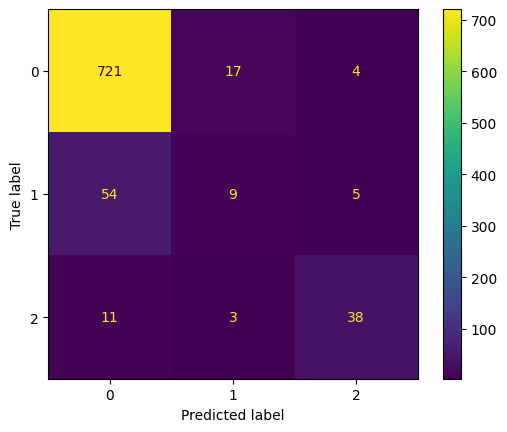

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assicurarsi che il modello sia in modalità di valutazione
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()

# Funzione per la predizione batch-wise
def predict_in_batches(model, X, batch_size=32):
    dataset = TensorDataset(torch.tensor(X, dtype=torch.float32).permute(0, 3, 1, 2))  # Converti in formato PyTorch (batch, channels, height, width)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    all_preds = []
    with torch.no_grad():
        for batch in dataloader:
            X_batch = batch[0].to(device)  # Sposta i dati su GPU
            outputs = model(X_batch)  # Forward pass
            preds = torch.argmax(outputs, dim=1)  # Prendi la classe con probabilità più alta
            all_preds.extend(preds.cpu().numpy())  # Riporta su CPU e salva

    return np.array(all_preds)

# Esegui le predizioni su X_test
y_test_pred = predict_in_batches(model, X_test, batch_size=32)

# Calcolo dell'accuratezza
test_accuracy = np.mean(np.argmax(Y_test[:, 3:], axis=-1) == y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Genera e visualizza la matrice di confusione
cm = confusion_matrix(np.argmax(Y_test[:, 3:], axis=-1), y_test_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()


# Predictions on strange images

In [ ]:
%cd ..

/content/drive/.shortcut-targets-by-id/1_uEu56UfwrBHAm5_JXL_gNVyl5kFHtG5/HPPS/Project/ModelClassification


In [ ]:
%ls

Dataset/  Models/  Weights/


In [ ]:
%cd Dataset/

/content/drive/.shortcut-targets-by-id/1_uEu56UfwrBHAm5_JXL_gNVyl5kFHtG5/HPPS/Project/ModelClassification/Dataset


Strange Images Accuracy: 1.0000


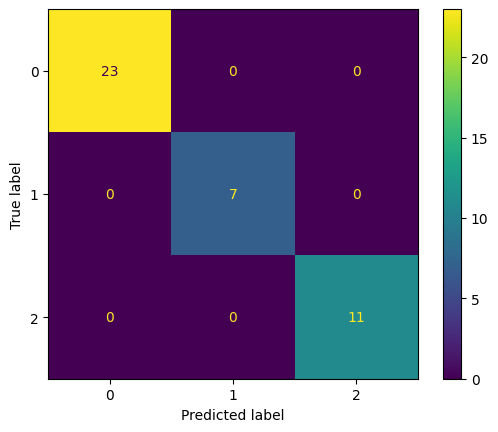

In [ ]:
import torch
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Caricamento del CSV con le etichette per le immagini strane
class_labels_df = pd.read_csv("strange_images_classes.csv")

# Mappatura delle classi
class_mapping = {0: 0, 30: 1, 100: 2}
y_strange_true = np.array([class_mapping[val] for val in class_labels_df["Classe"] if val in class_mapping])

# Percorso del dataset di immagini
dataset_path = "strange_images/Immagini"
valid_image_formats = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")
IMAGE_SIZE = (300, 300)

# Caricamento e preprocessing delle immagini
X_test_strange = []
image_filenames = sorted([img for img in os.listdir(dataset_path) if img.lower().endswith(valid_image_formats)])

for image_name in image_filenames:
    image_path = os.path.join(dataset_path, image_name)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        image = cv2.resize(image, IMAGE_SIZE)  # Resize
        image = image.astype('float32') / 255.0  # Normalizzazione
        X_test_strange.append(image)

# Convertire in tensore PyTorch con formato corretto (batch, canale, altezza, larghezza)
X_test_strange = np.array(X_test_strange)
X_test_strange = np.expand_dims(X_test_strange, axis=1)  # Aggiunge il canale (1, per grayscale)

# Creazione DataLoader
dataset = TensorDataset(torch.tensor(X_test_strange, dtype=torch.float32))
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

# Caricamento del modello
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()  # Modalità valutazione

# Funzione per predizioni batch-wise
def predict_in_batches(model, dataloader):
    all_preds = []
    with torch.no_grad():
        for batch in dataloader:
            X_batch = batch[0].to(device)
            outputs = model(X_batch)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
    return np.array(all_preds)

# Eseguire le predizioni
y_strange_pred = predict_in_batches(model, dataloader)

# Verifica dimensioni
if len(y_strange_pred) != len(y_strange_true):
    raise ValueError(f"Mismatch tra predizioni ({len(y_strange_pred)}) e ground truth ({len(y_strange_true)})!")

# Calcolo accuratezza
strange_accuracy = np.mean(y_strange_true == y_strange_pred)
print(f"Strange Images Accuracy: {strange_accuracy:.4f}")

# Matrice di confusione
cm_strange = confusion_matrix(y_strange_true, y_strange_pred)
ConfusionMatrixDisplay(cm_strange).plot()
plt.show()
